<a href="https://colab.research.google.com/github/mkm-world/Loan-Credit-Worthiness-Prediction/blob/main/Loan_Credit_Worthiness_Prediction_Winning_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Loan Creditworthiness: Winning Solution


This notebook provides a simple approach to the Bluechip Data & AI 2024 Summit Hackathon on **Predicting Loan Creditworthiness**.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [ ]:
input_dir = "/content/"

train = pd.read_csv(input_dir + "Train.csv")

train

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,65288,LP002560,0,1,0,0,0,1297,3293.124489,17,373,1,1,1,3750
5894,86963,LP002585,1,1,0,0,0,7358,0.000000,17,365,1,2,1,3547
5895,69407,LP002175,1,1,2,0,0,150,0.000000,170,353,1,1,1,3750
5896,82002,LP002560,1,0,0,0,0,2230,0.000000,222,367,1,2,0,3750


In [ ]:
test = pd.read_csv(input_dir + "Test.csv")

test.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750


In [ ]:
sample_sub = pd.read_csv(input_dir + "Sample Submission.csv")

sample_sub.head()

,ID,Loan_Status
0,70607,NaN
1,58412,NaN
2,88755,NaN
3,97271,NaN
4,70478,NaN


In [ ]:
train["Credit_History"].value_counts()

,count
Credit_History,
1,5429
0,469


## Data Cleaning + Light EDA (Explanatory Data Analysis)

### Missing Values Check

In [ ]:
train.isnull().sum()

,0
ID,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0


In [ ]:
test.isnull().sum()

,0
ID,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0


Both the train and test sets contain no missing values.

In [ ]:
for col in train.columns:
  print(train[col].value_counts())

ID
74768    1
52017    1
66995    1
67421    1
26778    1
        ..
55061    1
57095    1
53863    1
73654    1
84112    1
Name: count, Length: 5898, dtype: int64
Loan_ID
LP002585    767
LP002187    740
LP002231    718
LP002175    463
LP002224    364
           ... 
LP001199      1
LP002386      1
LP001637      1
LP001073      1
LP001565      1
Name: count, Length: 457, dtype: int64
Gender
1    5372
0     526
Name: count, dtype: int64
Married
1    5040
0     858
Name: count, dtype: int64
Dependents
0     3659
1     1157
3+     546
2      536
Name: count, dtype: int64
Education
0    5189
1     709
Name: count, dtype: int64
Self_Employed
0    5263
1     635
Name: count, dtype: int64
ApplicantIncome
150      879
81000     43
8421      11
8415      11
8412       9
        ... 
31822      1
2018       1
7847       1
853        1
2230       1
Name: count, Length: 3708, dtype: int64
CoapplicantIncome
0.000000        2749
20000.000000      30
3391.175054        1
557.097981         1
484.4046

### Checking Data Types

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB


## Feature Engineering + Data Preprocessing

In [ ]:
# join train and test for easy preprocessing
train["source"] = "train"
test["source"] = "test"

all_df = pd.concat([train, test])

all_df.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,source
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1.0,6000,train
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0.0,6000,train
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0.0,6000,train
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1.0,3750,train
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1.0,3750,train


In [ ]:
# define function to add features, ratio features between applicant income, loan amount, loan term, and coapplicant income

def add_features(df):
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['LoanAmount_Income_Ratio'] = df['LoanAmount'] / df['ApplicantIncome']
    df['Loan_repayment_rate'] = df['LoanAmount'] / df['Loan_Amount_Term']
    df['Loan_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']
    df['Loan_repayment_inc_Ratio'] = df['Loan_repayment_rate'] / df['Total_Income']
    df['Loan_repayment_Applicant_inc_Ratio'] = df['Loan_repayment_rate'] / df['ApplicantIncome']
    df['Loan_income_through_term'] = df['ApplicantIncome'] * df['Loan_Amount_Term']
    df['Loan_total'] = df['LoanAmount'] * df['Loan_Amount_Term']

    return df

all_df = add_features(all_df)

In [ ]:
# Handle uncommon Loan IDs

top_categories = train['Loan_ID'].value_counts().nlargest(30).index

all_df['Loan_ID'] = np.where(all_df['Loan_ID'].isin(top_categories), all_df['Loan_ID'], 'other')

all_df['Loan_ID'].value_counts()

,count
Loan_ID,
other,1835
LP002187,1095
LP002585,1066
LP002231,1028
LP002175,653
LP002224,522
LP002560,521
LP001385,155
LP001790,150


In [ ]:
# extract unique insights for each loan id, grouping with loan_id and summarizing key factors

summary_dict_list = []
for loan, loan_df in train.groupby('Loan_ID'):
  print(f"Loan ID: {loan}")
  id_summary_dict = {"Loan_ID": loan}
  id_summary_dict["loan_amount_mean"] = loan_df['LoanAmount'].mean()
  id_summary_dict["loan_amount_std"] = loan_df['LoanAmount'].std()

  id_summary_dict["loan_amount_term_mean"] = loan_df['Loan_Amount_Term'].mean()
  id_summary_dict["loan_amount_term_std"] = loan_df['Loan_Amount_Term'].std()

  id_summary_dict["loan_status_count"] = loan_df['Loan_Status'].size
  id_summary_dict["loan_status_mean"] = loan_df['Loan_Status'].mean()
  id_summary_dict["loan_status_std"] = loan_df['Loan_Status'].std()
  id_summary_dict["loan_status_sum"] = loan_df['Loan_Status'].sum()


  id_summary_dict
  summary_dict_list.append(id_summary_dict)

summary_df = pd.DataFrame(summary_dict_list)
summary_df


Loan ID: LP001002
Loan ID: LP001003
Loan ID: LP001005
Loan ID: LP001008
Loan ID: LP001011
Loan ID: LP001013
Loan ID: LP001014
Loan ID: LP001018
Loan ID: LP001020
Loan ID: LP001024
Loan ID: LP001027
Loan ID: LP001028
Loan ID: LP001029
Loan ID: LP001030
Loan ID: LP001032
Loan ID: LP001034
Loan ID: LP001036
Loan ID: LP001038
Loan ID: LP001041
Loan ID: LP001043
Loan ID: LP001046
Loan ID: LP001050
Loan ID: LP001052
Loan ID: LP001066
Loan ID: LP001068
Loan ID: LP001073
Loan ID: LP001086
Loan ID: LP001087
Loan ID: LP001091
Loan ID: LP001095
Loan ID: LP001097
Loan ID: LP001098
Loan ID: LP001100
Loan ID: LP001106
Loan ID: LP001109
Loan ID: LP001112
Loan ID: LP001114
Loan ID: LP001119
Loan ID: LP001120
Loan ID: LP001123
Loan ID: LP001131
Loan ID: LP001136
Loan ID: LP001137
Loan ID: LP001138
Loan ID: LP001146
Loan ID: LP001151
Loan ID: LP001155
Loan ID: LP001157
Loan ID: LP001164
Loan ID: LP001179
Loan ID: LP001186
Loan ID: LP001194
Loan ID: LP001195
Loan ID: LP001197
Loan ID: LP001199
Loan ID: L

,Loan_ID,loan_amount_mean,loan_amount_std,loan_amount_term_mean,loan_amount_term_std,loan_status_count,loan_status_mean,loan_status_std,loan_status_sum
0,LP001002,51.333333,41.186567,364.000000,5.291503,3,1.000000,0.000000,3
1,LP001003,77.000000,74.939976,361.666667,5.859465,3,1.000000,0.000000,3
2,LP001005,343.500000,123.743687,361.500000,14.849242,2,1.000000,0.000000,2
3,LP001008,139.000000,111.727347,371.666667,0.577350,3,1.000000,0.000000,3
4,LP001011,17.000000,NaN,102.000000,NaN,1,1.000000,NaN,1
...,...,...,...,...,...,...,...,...,...
452,LP002586,17.000000,0.000000,364.000000,12.727922,2,1.000000,0.000000,2
453,LP002587,82.000000,63.150614,367.666667,3.011091,6,0.833333,0.408248,5
454,LP002588,58.000000,NaN,357.000000,NaN,1,1.000000,NaN,1
455,LP002600,24.700000,15.613740,333.900000,70.686239,10,0.900000,0.316228,9


In [ ]:
all_df = pd.merge(all_df, summary_df, on="Loan_ID", how="left")
all_df.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,...,Loan_income_through_term,Loan_total,loan_amount_mean,loan_amount_std,loan_amount_term_mean,loan_amount_term_std,loan_status_count,loan_status_mean,loan_status_std,loan_status_sum
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,...,3023064,6171,90.486072,101.314398,355.317549,52.363252,718.0,0.832869,0.373353,598.0
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,...,55500,69560,97.529412,90.924662,364.960784,28.085556,51.0,0.843137,0.367290,43.0
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,...,1736172,5916,90.486072,101.314398,355.317549,52.363252,718.0,0.832869,0.373353,598.0
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,...,53850,83288,121.628571,110.692424,349.809524,65.383057,105.0,0.857143,0.351605,90.0
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,...,2997948,6324,90.486072,101.314398,355.317549,52.363252,718.0,0.832869,0.373353,598.0


Only two columns, **Loan_ID** and **Dependents** have non-numeric data type. The Loan_Is is not of impoprtance at the moment, so we will  be dropping it. And for the Dependents columnm, we will be performing one hot encoding with the use of the `pd.get_dummies()` method.

### One-Hot Encoding

In [ ]:
all_df_processed = pd.get_dummies(all_df, columns=['Dependents', 'Loan_ID'])

# fill missing values with -999
all_df_processed = all_df_processed.fillna(-999)

all_df_processed.head()

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_ID_LP002229,Loan_ID_LP002231,Loan_ID_LP002531,Loan_ID_LP002555,Loan_ID_LP002556,Loan_ID_LP002560,Loan_ID_LP002571,Loan_ID_LP002582,Loan_ID_LP002585,Loan_ID_other
0,74768,1,1,1,0,8328,0.000000,17,363,1,...,False,True,False,False,False,False,False,False,False,False
1,79428,1,1,0,0,150,3857.458782,188,370,1,...,False,False,False,False,False,False,False,False,False,False
2,70497,0,0,0,0,4989,314.472511,17,348,1,...,False,True,False,False,False,False,False,False,False,False
3,87480,1,1,0,0,150,0.000000,232,359,1,...,False,False,False,False,False,False,False,False,False,False
4,33964,1,1,0,0,8059,0.000000,17,372,1,...,False,True,False,False,False,False,False,False,False,False


### Feature Selection

In [ ]:
# re-split all_df_processed into train and test
train_processed = all_df_processed[all_df_processed['source'] == 'train']
test_processed = all_df_processed[all_df_processed['source'] == 'test']


# seperate features and target
features = all_df_processed.columns.difference(['ID', 'Loan_Status', 'Loan_ID','source'])

X = train_processed[features]
y = train_processed['Loan_Status']

### Data Splitting

In [ ]:
# splitting into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12, stratify=y)

## Modeling

### Import Models

In [ ]:
!pip install catboost -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [ ]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

### Logistic regression

In [ ]:
# train Logistic regression model
log_reg = LogisticRegression(class_weight="balanced", C = 100)
log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_test)

# evaluate model
accuracy_score(y_test, y_pred)

0.4535593220338983

### Random Forest

In [ ]:
# train random forest model
rf = RandomForestClassifier(max_depth = 8, random_state = 42, n_estimators= 1000, class_weight="balanced")
rf.fit(X_train, y_train)

# make predictions
y_pred = rf.predict(X_test)

# evaluate model
accuracy_score(y_test, y_pred)

0.7159322033898305

### XGBoost

In [ ]:
# train xgboost model
xgb = XGBClassifier(max_depth = 6, random_state = 42, n_estimators= 400, learning_rate = 0.05, scale_pos_weight = 0.4)
xgb.fit(X_train, y_train)

# make predictions
y_pred = xgb.predict(X_test)

# evaluate model
accuracy_score(y_test, y_pred)

0.7905084745762712

### CatBoost

In [ ]:
# train catboost model
cat = CatBoostClassifier(max_depth = 6, random_state = 42, n_estimators= 400, learning_rate = 0.05, verbose = False, auto_class_weights='Balanced' )
cat.fit(X_train, y_train)

# make predictions
y_pred = cat.predict(X_test)

# evaluate model
accuracy_score(y_test, y_pred)

0.6847457627118644

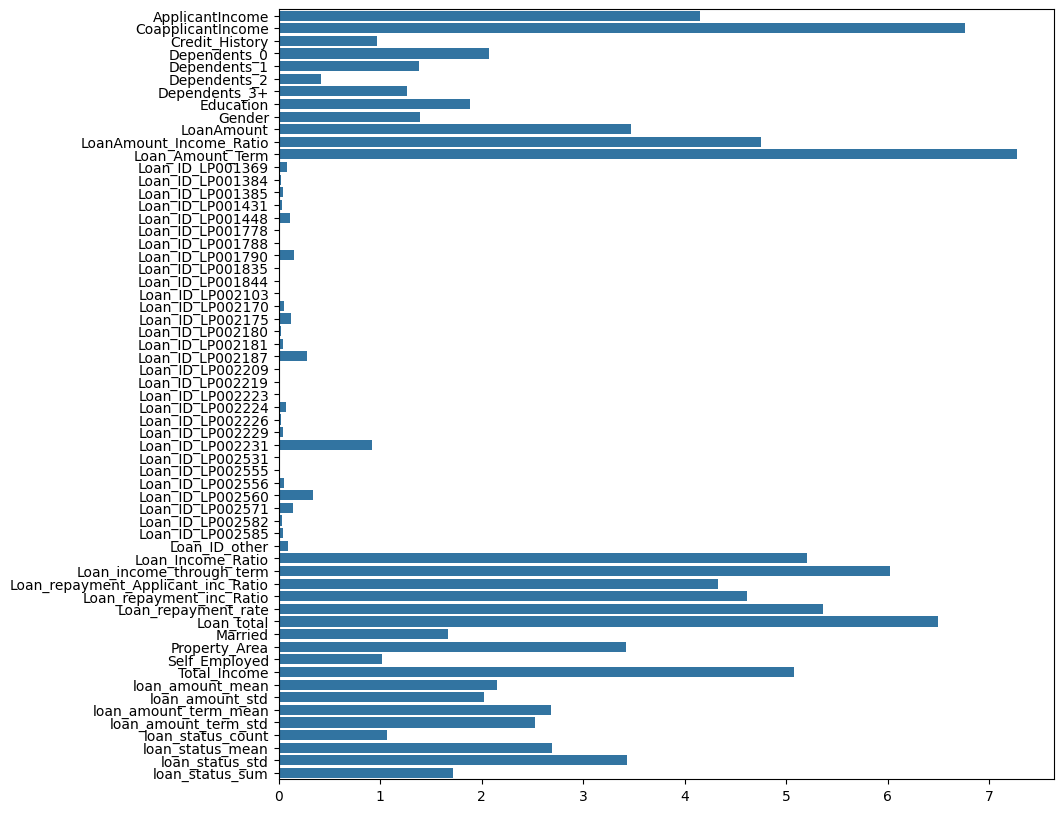

In [ ]:
# plot catboost feature importance
plt.figure(figsize=(10, 10))
sns.barplot(x=cat.feature_importances_, y=cat.feature_names_)
plt.show()

## Optimize Catboost

In [ ]:
!pip install optuna -qq
!pip install catboost -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
def objective(trial):
    # Parameters to optimize
    param = {
        'iterations': trial.suggest_int('iterations', 300, 5000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),
        'max_bin': trial.suggest_int('max_bin', 100, 400),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),

        # Class weights for imbalance
        'auto_class_weights': 'SqrtBalanced',

        # GPU specific parameters
        'task_type': 'GPU',

        # Other fixed parameters
        'eval_metric': 'Accuracy',
        'random_seed': 42,
        'verbose': False
    }

    # Conditional parameters
    if param['bootstrap_type'] == 'Bayesian':
        param['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0, 10)
    elif param['bootstrap_type'] == 'Bernoulli':
        param['subsample'] = trial.suggest_float('subsample', 0.1, 1)

    # Initialize model
    model = CatBoostClassifier(**param)

    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate model
    return accuracy_score(y_test, y_pred)

def optimize_catboost(n_trials=50):
    study = optuna.create_study(direction='maximize',
                                pruner=optuna.pruners.MedianPruner(n_warmup_steps=5),
                                sampler=optuna.samplers.TPESampler(seed=42))

    study.optimize(objective, n_trials=n_trials)  # Using n_jobs=1 since we're using GPU

    print('Best trial:')
    trial = study.best_trial
    print(f'  Value: {trial.value:.5f}')
    print('  Params: ')
    for key, value in trial.params.items():
        print(f'    {key}: {value}')

    return study.best_params

In [ ]:
#optimize_catboost()

In [ ]:
# train catboost with optimal params

params ={'iterations': 1799,
 'depth': 3,
 'learning_rate': 0.005072198821202928,
 'l2_leaf_reg': 3.544473248113894e-07,
 'min_data_in_leaf': 34,
 'max_bin': 180,
 'bootstrap_type': 'Bernoulli',
 'subsample': 0.10358316675385222}

params['auto_class_weights'] = 'SqrtBalanced'
params['task_type'] = 'CPU'
params['eval_metric'] = 'Accuracy'
params['random_seed'] = 42
params['verbose'] = False

cat = CatBoostClassifier(**params)
cat.fit(X, y)

## Make predictions - Generate submission file


### Re-train model on the whole data

### Make predictions on the test dataset

In [ ]:
# make predictions
test_predictions_proba = cat.predict_proba(test_processed[features])[:,1]

test_predictions = np.where(test_predictions_proba > 0.65, 1, 0)

# write predicions to sample sub file
sample_sub['Loan_Status'] = test_predictions

# display sample submission
display(sample_sub.head())

# save sample submission
sample_sub.to_csv('catboost-optuna-final-0.65.csv', index=False)

,ID,Loan_Status
0,70607,1
1,58412,1
2,88755,1
3,97271,1
4,70478,1


In [ ]:
sample_sub.describe()

,ID,Loan_Status
count,2528.000000,2528.000000
mean,55348.986551,0.890032
std,26098.461169,0.312912
min,10001.000000,0.000000
25%,32297.250000,1.000000
50%,55979.000000,1.000000
75%,77562.250000,1.000000
max,99931.000000,1.000000


## What did I do differently?  
- Creative Feature Engineering.
- The use of `auto_class_weight` parameter on catboost.
- Increasing the prediction threshold from the tradtional 0.5 to 0.6, experimented with 0.7 too.
- Trusting the process, not doing anything unethical to manipulate the public leaderboard score.

## Experiments I didn't get to try
- Original Data: Adversarial validation to check if there's significant difference the original and modified data.
- Exploratory Data Analysis(EDA): To find deep patterns in the data.
- Ensembling techniques
- Stratified KFold